# Movie Reviews Analysis Sentiment ML

## 1. Preparations

### 1.1 Library Preparations

In [10]:
pip install pandas nltk spacy beautifulsoup4 tqdm scikit-learn matplotlib wordcloud gensim fasttext-wheel seaborn python-dotenv

  Using cached numpy-2.3.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached numpy-2.3.0-cp311-cp311-manylinux_2_28_x86_64.whl (16.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [seaborn]m1/2 [seaborn]
Note: you may need to restart the kernel to use updated packages.


In [32]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


### 1.2 Dataset Preparations

In [2]:
import pandas as pd

df = pd.read_csv('datasets/raw/IMDB_dataset.csv')
df.sample(10)

,review,sentiment
41596,"Rita Hayworth is just stunning at times and, f...",negative
25393,Movies like this give independent films a bad ...,negative
10170,I know what most of people will think about th...,positive
2669,This show is brilliantly hilarious! I started ...,positive
43552,I really like Kinski he is a great actor. I've...,negative
45059,This was a classic case of something that shou...,negative
10722,"As a kid, I loved computer animation although ...",positive
37230,"Ed Wood, perhaps the worst film maker of all t...",negative
48891,"""Yokai Daisenso"" is a children's film by Takas...",positive
9572,"Being a fan of bad movies, I was thrilled to f...",negative


In [3]:
df.count()

review       50000
sentiment    50000
dtype: int64

In [4]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

## 2. Preprocessing

### 2.1 Dataset Cleaning

#### 2.1.1 Cleaning

In [6]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 33.4 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [5]:
import re
import string
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
from html import unescape

In [6]:
# Download NLTK
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load spacy model
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt_tab to /home/user/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/user/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [7]:
# Stopwords & lemmatizer
custom_stopwords = {'film', 'movie', 'scene', 'character', 'story', 'watch', 'see', 'make', 'time', 'people', 'thing'}
stop_words = set(stopwords.words('english')).union(custom_stopwords)

def preprocess_text(text):
    text = unescape(text)
    
    # 1. Remove HTML
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # 3. Remove emoji / non-ASCII
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    
    # 4. Lowercase
    text = text.lower()
    
    # 5. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # 6. Tokenization
    tokens = word_tokenize(text)
    
    # 7. Lemmatization using spaCy
    doc = nlp(" ".join(tokens))
    tokens = [token.lemma_ for token in doc]

    # 8. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    
    # 9. Normalize whitespace & join back to string
    clean_text = " ".join(tokens)
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()
    
    return clean_text

In [8]:
df_test = df.iloc[1]['review']
df_test

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [9]:
df_cleaned_test = preprocess_text(df_test)
df_cleaned_test

'wonderful little production filming technique unassuming oldtimebbc fashion give comfort sometimes discomforte sense realism entire piece actor extremely well choose michael sheen get polari voice pat truly seamless editing guide reference williams diary entry well worth watching terrificly write perform piece masterful production one great master comedy life realism really come home little fantasy guard rather use traditional dream technique remain solid disappear play knowledge sense particularly concern orton halliwell set particularly flat halliwell mural decorate every surface terribly well'

In [ ]:
# df['clean_review'] = df['review'].apply(preprocess_text)
# df['clean_review'].sample(10)

In [ ]:
# positive_df = df[df['sentiment'] == 'positive'].sample(n=2500, random_state=42)
# negative_df = df[df['sentiment'] == 'negative'].sample(n=2500, random_state=42)

# # Gabungkan dan shuffle
# df_sample = pd.concat([positive_df, negative_df]).sample(frac=1, random_state=42).reset_index(drop=True)

# # Cek distribusi
# print(df_sample['sentiment'].value_counts())
# df_sample.head()

sentiment
positive    2500
negative    2500
Name: count, dtype: int64


,review,sentiment
0,"Why would this film be so good, but only gross...",positive
1,"The name ""cult movie"" is often given to films ...",negative
2,Another stinker from the PM Entertainment grou...,negative
3,It really isn't hard to understand this movie!...,positive
4,"Make no mistake, Maureen O'Sullivan is easily ...",positive


In [10]:
from tqdm import tqdm
tqdm.pandas()

df['clean_review'] = df['review'].progress_apply(preprocess_text)
df.sample(5)

100%|██████████| 50000/50000 [36:00<00:00, 23.14it/s]  


,review,sentiment,clean_review
32812,"Seriously, I've read some of the reviews on th...",negative,seriously read review ask movieye give set dir...
13683,Born in 1946 I was about eight years old when ...,positive,bear 1946 eight year old first view leave deep...
23633,"This movie stars Jay Leno as a Detroit cop, To...",positive,star jay leno detroit cop tony costa pat morit...
12086,"Kane is a killer named Jacob Goodnight, he liv...",positive,kane killer name jacob goodnight live burn old...
13721,I've described this film as surprising... this...,positive,describe surprising true many respect subject ...


In [12]:
df.to_csv('datasets/cleaned/IMDB_dataset_50000_cleaned.csv')

#### 2.1.2 Visualizing

In [13]:
df.sample(10)

,review,sentiment,clean_review
7891,"I rented this by mistake. I thought, after a c...",negative,rent mistake think cursory examination box tim...
32262,'Felony' is a B-movie. No doubt about it.<br /...,negative,felony bmovie doubt itof course take look cast...
19809,Arthur Bach is decidedly unhappy in his life a...,positive,arthur bach decidedly unhappy life multimillio...
13854,I've been wanting to see this movie for a very...,positive,want long eventually buy ebay since hard find ...
13498,"I watched this movie last night, and let me sa...",negative,last night let say absolute bad ever entire tr...
37822,Although this is generally a cheesy jungle-adv...,negative,although generally cheesy jungleadventure high...
14605,Angela Lansbury plays Eglantine a middle aged ...,positive,angela lansbury play eglantine middle aged lad...
40670,We gave up at the point where George Clooney's...,negative,give point george clooney fingernail extract s...
31564,"The film tackles the here and now horror of ""r...",positive,tackle horror rendition multicast transglobal ...
29843,I have just seen Caribe a couple of nights ago...,negative,caribe couple night ago annual vistas festival...


In [14]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [15]:
import matplotlib.pyplot as plt
from collections import Counter

# Pisahkan data berdasarkan sentimen
positive_reviews = df[df['sentiment'] == 'positive']['clean_review']
negative_reviews = df[df['sentiment'] == 'negative']['clean_review']

# Gabungkan teks jadi satu string per kategori
positive_words = " ".join(positive_reviews).split()
negative_words = " ".join(negative_reviews).split()

# Hitung frekuensi kata
positive_counts = Counter(positive_words).most_common(10)
negative_counts = Counter(negative_words).most_common(10)


##### Top 10 Most Word

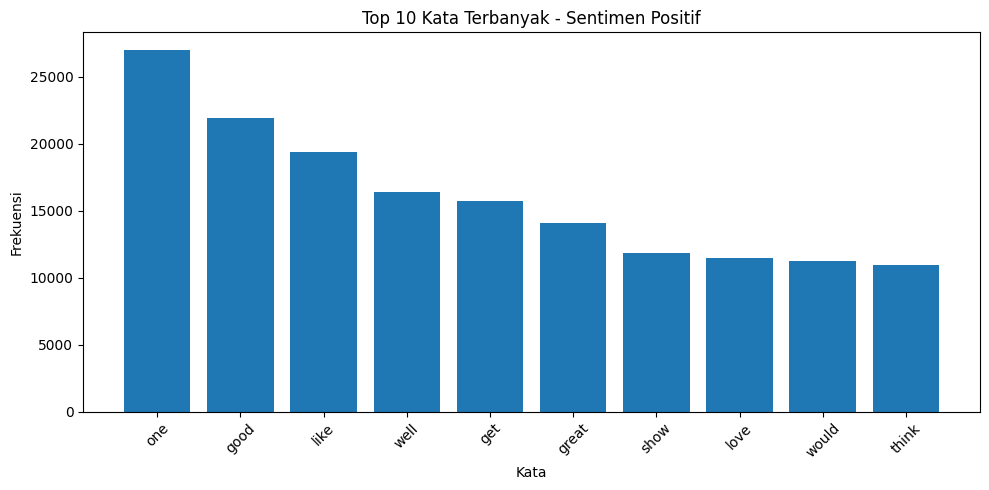

In [16]:
# Visualisasi positif
plt.figure(figsize=(10, 5))
words, counts = zip(*positive_counts)
plt.bar(words, counts)
plt.title("Top 10 Kata Terbanyak - Sentimen Positif")
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

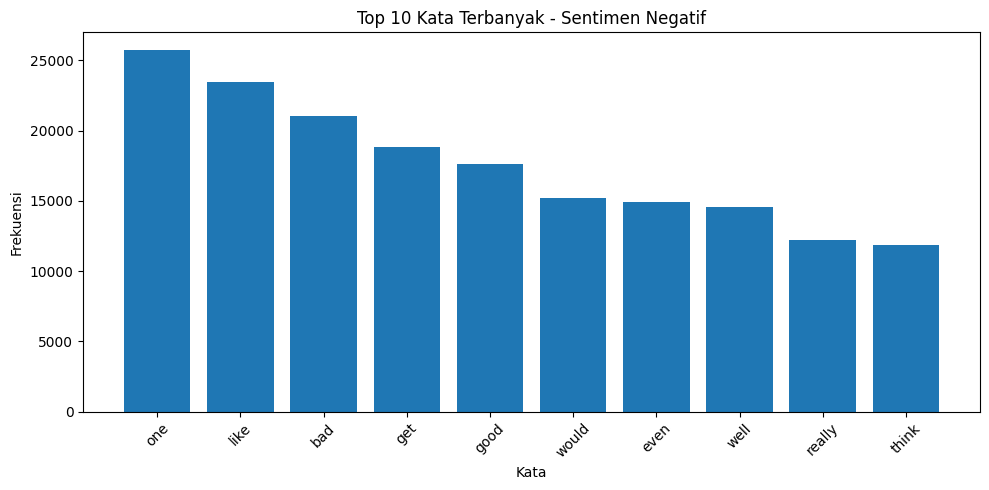

In [17]:
# Visualisasi negatif
plt.figure(figsize=(10, 5))
words, counts = zip(*negative_counts)
plt.bar(words, counts)
plt.title("Top 10 Kata Terbanyak - Sentimen Negatif")
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Wordcloud

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ambil semua teks per sentimen
positive_text = " ".join(df[df['sentiment'] == 'positive']['clean_review'])
negative_text = " ".join(df[df['sentiment'] == 'negative']['clean_review'])

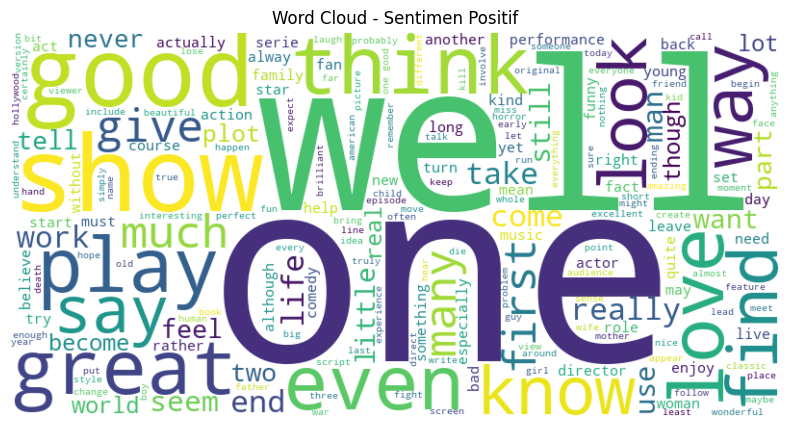

In [19]:
# WordCloud - Sentimen Positif
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Sentimen Positif')
plt.show()

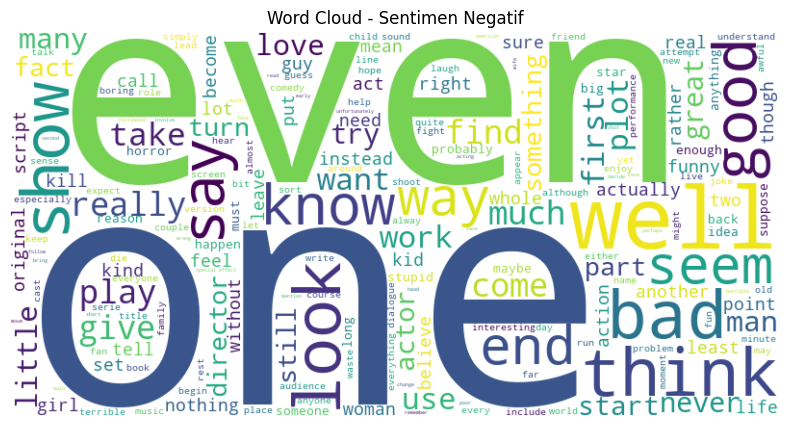

In [20]:
# WordCloud - Sentimen Negatif
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Sentimen Negatif')
plt.show()

### 2.2 Utility for Dataset Preprocessing

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2, SelectKBest

In [22]:
df = pd.read_csv('datasets/cleaned/IMDB_dataset_50000_cleaned.csv')
df.sample(10)

,Unnamed: 0,review,sentiment,clean_review
46018,46018,Now maybe it had something to do with the fact...,positive,maybe something fact low point life really try...
33955,33955,Let me first start out by saying 1 out of 10 i...,negative,let first start say good unfortunate imdb tent...
37640,37640,I found this film to be an utter dissapointmen...,negative,find utter dissapointment talent available dir...
10539,10539,"The story-line of ""The Thief of Bagdad"" is com...",positive,storyline thief bagdad complex owe tell flashb...
3175,3175,"This movie is on cable sporadically, and I nev...",positive,cable sporadically never really think would si...
31557,31557,"What a fun movie! If you're a Giallo fan, Red ...",positive,fun giallo fan red queen kill real winner begi...
38291,38291,"Wow, even American Idol and So You Think You C...",negative,wow even american idol think dance adult stuff...
40134,40134,"Let's face it, lot's of bad movies are made al...",positive,let face lot bad work probably pour lot effort...
19585,19585,"I wouldn't give this movie a rating, it's not ...",negative,would give rating worthy pfieffer fan love wou...
6309,6309,"This film brought me to tears. I have to say, ...",positive,bring tear say beautiful husband home would as...


#### 2.2.1 TF-IDF Vectorizing

In [23]:
X_text = df['clean_review'].astype(str)
y = df['sentiment']

In [24]:
vectorizer = TfidfVectorizer(
    max_features=10000,       # Batasi jumlah kata (fitur)
    ngram_range=(1, 2),       # Unigram dan bigram
    min_df=100,               # Kata harus muncul di ≥100 dokumen
    max_df=0.9,               # Hapus kata yang muncul di >90% dokumen
    sublinear_tf=True,        # Scaling untuk TF agar lebih stabil
    stop_words="english"      # Stop Words
)

In [25]:
vectorizer.fit(X_text)
joblib.dump(vectorizer, 'output/tfidf/IMDB_dataset_50000_tfidf_vectorizer.pkl')

['output/tfidf/IMDB_dataset_50000_tfidf_vectorizer.pkl']

In [27]:
feature_names = np.array(vectorizer.get_feature_names_out())
feature_names

array(['100', '1000', '1010', ..., 'zombie', 'zone', 'zoom'], dtype=object)

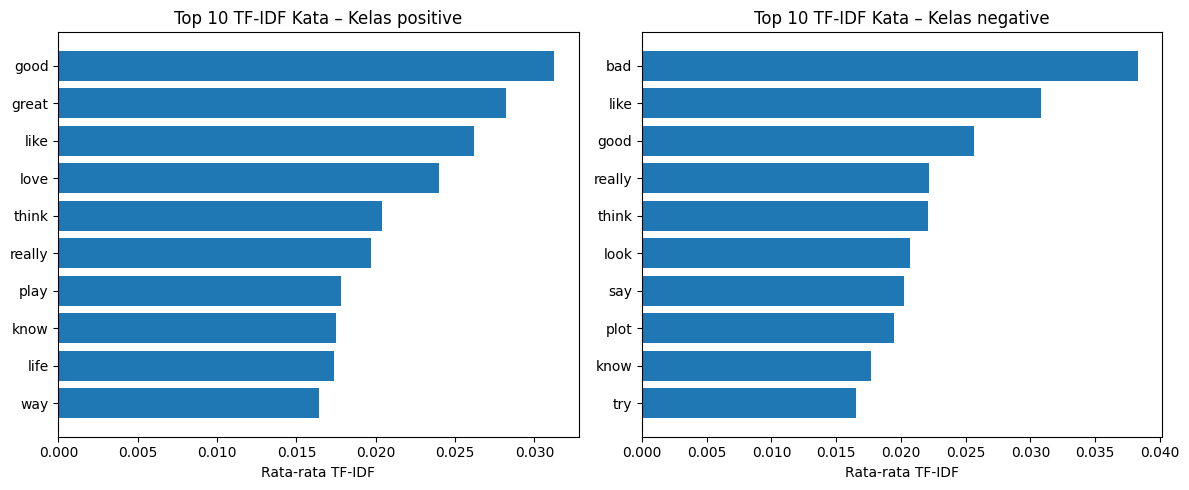

In [28]:
def plot_top_words_by_class(X, y, feature_names, kelas, top_n=10):
    X_class = X[np.array(y) == kelas]
    mean_scores = np.asarray(X_class.mean(axis=0)).flatten()
    top_idx = mean_scores.argsort()[-top_n:][::-1]
    top_words = feature_names[top_idx]
    top_scores = mean_scores[top_idx]

    plt.barh(top_words[::-1], top_scores[::-1])
    plt.title(f"Top {top_n} TF-IDF Kata – Kelas {kelas}")
    plt.xlabel("Rata-rata TF-IDF")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_top_words_by_class(X_tfidf, y, feature_names, "positive")

plt.subplot(1, 2, 2)
plot_top_words_by_class(X_tfidf, y, feature_names, "negative")
plt.tight_layout()
plt.show()

#### 2.2.2 Chi2 Selector

In [ ]:
X_text = df['clean_review'].astype(str)
y = df['sentiment']

In [ ]:
vectorizer = joblib.load('output/tfidf/IMDB_dataset_50000_tfidf_vectorizer.pkl')

In [ ]:
X_tfidf = vectorizer.transform(X_text)

In [29]:
chi2_scores, _ = chi2(X_tfidf, y)
selector = SelectKBest(score_func=chi2, k=3000)

In [30]:
selector.fit(X_tfidf, y)
joblib.dump(selector, 'output/tfidf/IMDB_dataset_50000_tfidf_chi2.pkl')

['output/tfidf/IMDB_dataset_50000_tfidf_chi2.pkl']

In [31]:
X_selected = selector.transform(X_tfidf)

In [30]:
# joblib.dump(X_selected, 'output/tfidf/IMDB_dataset_5000_tfidf_chi2.pkl')
# joblib.dump(y, 'output/labels/sentiment_labels.pkl')

['output/labels/sentiment_labels.pkl']

In [32]:
mask = selector.get_support()
selected_features = feature_names[mask]
selected_features

array(['1010', '110', '13th', ..., 'zero', 'zombie', 'zoom'], dtype=object)

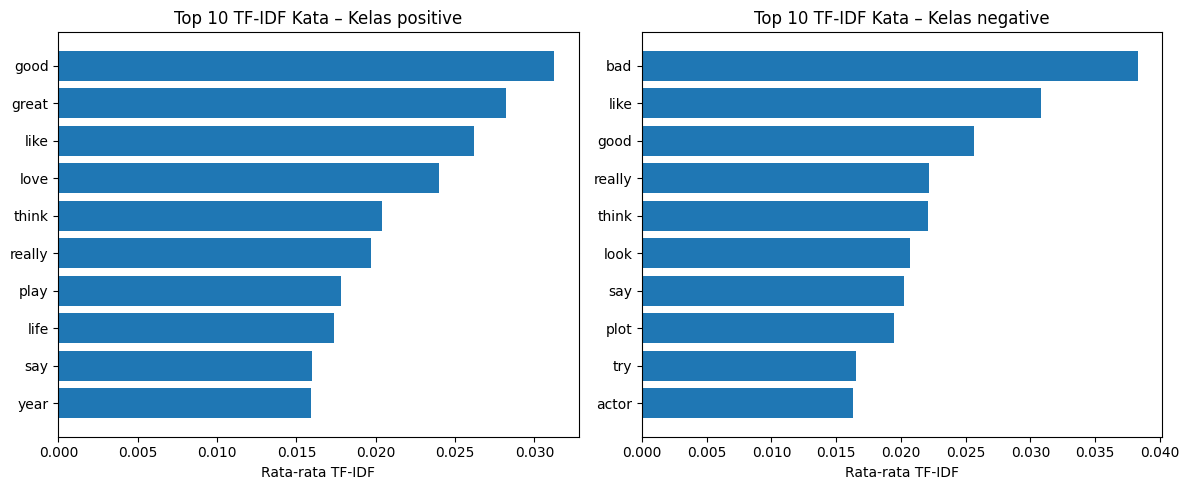

In [33]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_top_words_by_class(X_selected, y, selected_features, "positive")

plt.subplot(1, 2, 2)
plot_top_words_by_class(X_selected, y, selected_features, "negative")
plt.tight_layout()
plt.show()

#### 2.2.3 FastText Vectorizing

In [3]:
pip install gensim==4.3.2 scipy==1.10.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 87.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
Note: you may need to restart the kernel to use updated packages.


In [1]:
from gensim.models import FastText
from nltk.tokenize import word_tokenize
import pandas as pd

In [3]:
# 1. Load cleaned dataset
df = pd.read_csv('datasets/cleaned/IMDB_dataset_50000_cleaned.csv')
df.sample(5)

,Unnamed: 0,review,sentiment,clean_review
17891,17891,You've heard it said to live every moment as i...,negative,hear say live every moment last whether last d...
13901,13901,A Cryptozoologist captures a mythical chupacab...,negative,cryptozoologist capture mythical chupacabra ca...
38125,38125,According to the book The Last of the Cowboy H...,positive,accord book last cowboy hero joel mccrea audie...
608,608,I have recently seen this production on DVD. I...,positive,recently production dvd first since originally...
7114,7114,I have read and enjoyed many of James Lee Burk...,negative,read enjoy many james lee burkes robicheaux my...


In [5]:
# 2. Tokenisasi review (untuk training FastText)
tokenized_reviews = df['clean_review'].astype(str).apply(word_tokenize).tolist()

In [6]:
# 3. Train FastText model
fasttext_model = FastText(
    sentences=tokenized_reviews,
    vector_size=100,      # Ukuran embedding (lebih kecil = lebih ringan)
    window=5,
    min_count=5,          # Kata harus muncul minimal 5 kali
    workers=4,
    sg=1,                 # 1 = skip-gram, 0 = CBOW
    epochs=10
)

In [7]:
fasttext_model.save('output/fasttext/IMDB_dataset_50000_fasttext.model')

#### 2.2.4 FastText PreTrained

In [12]:
!cd models/libs/fasttext && wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip

--2025-06-16 16:01:17--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.35.7.82, 13.35.7.38, 13.35.7.128, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.35.7.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘models/embeddings/wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M   113MB/s    in 6.3s    

2025-06-16 16:01:23 (103 MB/s) - ‘models/embeddings/wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]



In [15]:
!unzip models/libs/fasttext/wiki-news-300d-1M.vec.zip -d models/libs/fasttext

Archive:  models/libs/fasttext/wiki-news-300d-1M.vec.zip
  inflating: models/libs/fasttext/wiki-news-300d-1M.vec  

## 3. Training & Testing

### 3.1 SVM with TF-IDF & Chi2

In [1]:
import pandas as pd
import joblib
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1. Load cleaned data
df = pd.read_csv('datasets/cleaned/IMDB_dataset_50000_cleaned.csv')
df.sample(5)

,Unnamed: 0,review,sentiment,clean_review
1722,1722,My mother worked with Dennis L. Raider for ele...,negative,mother work dennis raider eleven year mention ...
28910,28910,Ira Levin's Broadway smash comes to the screen...,negative,ira levins broadway smash come screen hardly m...
29564,29564,"In what attempts to be a positive story, Dolph...",negative,attempt positive dolph lundgren lead group mer...
23266,23266,I watched this movie yesterday and was highly ...,negative,yesterday highly disappointedheather graham to...
20376,20376,Over several years of looking for half-decent ...,negative,several year look halfdecent rent kid develop ...


In [3]:
X_text = df['clean_review']
y = df['sentiment']

In [4]:
# 2. Load vectorizer & selector
vectorizer = joblib.load('output/tfidf/IMDB_dataset_50000_tfidf_vectorizer.pkl')
selector = joblib.load('output/tfidf/IMDB_dataset_50000_tfidf_chi2.pkl')

In [5]:
# 3. Ekstraksi fitur
X_tfidf = vectorizer.transform(df['clean_review'])        # TF-IDF transform
X_selected = selector.transform(X_tfidf)                  # Apply chi2 selector

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)

In [7]:
model = LinearSVC()
model.fit(X_train, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [ ]:
joblib.dump(model, 'models/generated/svm_tfidf_chi2.pkl')

In [8]:
y_pred = model.predict(X_test)

In [44]:
print("🔍 Classification Report:")
print(classification_report(y_test, y_pred))

🔍 Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.88      0.89      5000
    positive       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



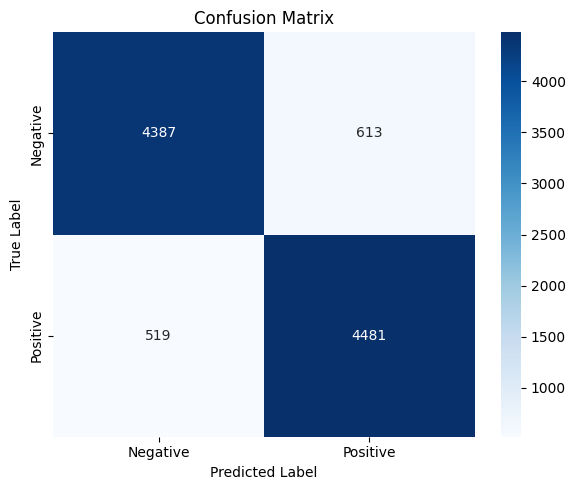

In [9]:
cm = confusion_matrix(y_test, y_pred)
labels = ['Negative', 'Positive']

# Buat heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [10]:
print(f"🎯 Accuracy: {accuracy_score(y_test, y_pred):.4f}")

🎯 Accuracy: 0.8868


### 3.2 SVM with TF-IDF & Chi2 & FastText

In [2]:
import pandas as pd
import numpy as np
import joblib
from nltk.tokenize import word_tokenize
from gensim.models import FastText
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 1. Load cleaned data
df = pd.read_csv('datasets/cleaned/IMDB_dataset_50000_cleaned.csv')
df.sample(5)

,Unnamed: 0,review,sentiment,clean_review
46185,46185,Seriously I don't get why people are all like ...,negative,seriously get like god step good ever bunch ju...
13781,13781,How did this film get into the Berlin Film Fes...,negative,get berlin festival understand get panorama se...
27087,27087,"If you are under the age of 6 or 7, then you'r...",negative,age really enjoy young daughter glue adult sta...
45705,45705,"First, I am not really a fan of the whole ""thi...",negative,first really fan whole eat flesh disgusting ne...
1585,1585,One of the most magnificent movies ever made. ...,positive,one magnificent ever acting charles buchinski ...


In [4]:
X_text = df['clean_review']
y = df['sentiment']

In [5]:
vectorizer = joblib.load('output/tfidf/IMDB_dataset_50000_tfidf_vectorizer.pkl')
selector = joblib.load('output/tfidf/IMDB_dataset_50000_tfidf_chi2.pkl')
fasttext_model = FastText.load('output/fasttext/IMDB_dataset_50000_fasttext.model')

In [6]:
X_tfidf = vectorizer.transform(X_text)
X_selected = selector.transform(X_tfidf)

In [7]:
def get_average_vector(tokens, model, vector_size=100):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

In [8]:
tokenized = X_text.apply(word_tokenize)
X_fasttext = np.array([
    get_average_vector(tokens, fasttext_model, 100) for tokens in tokenized
])

In [9]:
X_combined = hstack([X_selected, csr_matrix(X_fasttext)])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, stratify=y, random_state=42
)

In [11]:
model = LinearSVC()
model.fit(X_train, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [16]:
joblib.dump(model, 'models/generated/svm_tfidf_chi2_fasttext.pkl')

['models/generated/svm_tfidf_chi2_fasttext.pkl']

In [12]:
y_pred = model.predict(X_test)

In [13]:
print("🔍 Classification Report:")
print(classification_report(y_test, y_pred))

🔍 Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.89      0.90      5000
    positive       0.89      0.90      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



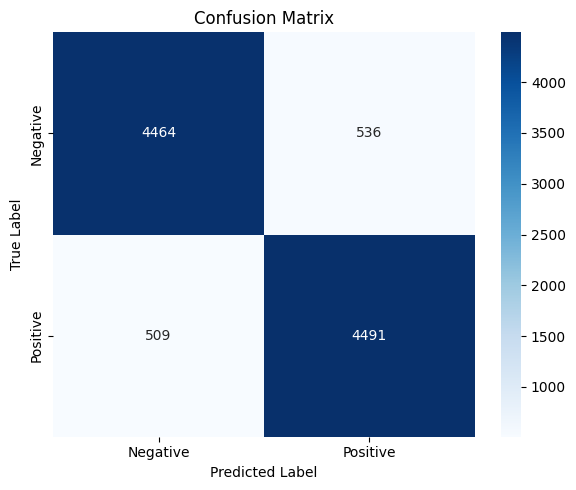

In [14]:
cm = confusion_matrix(y_test, y_pred)
labels = ['Negative', 'Positive']

# Buat heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [15]:
print(f"\n🎯 Accuracy: {accuracy_score(y_test, y_pred):.4f}")


🎯 Accuracy: 0.8955


### 3.3 SVM with TF-IDF & Chi2 & FastText Pre-Trained

In [30]:
import pandas as pd
import numpy as np
import joblib
from nltk.tokenize import word_tokenize
from gensim.models import KeyedVectors
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# 1. Load cleaned data
df = pd.read_csv('datasets/cleaned/IMDB_dataset_50000_cleaned.csv')
df.sample(5)

,Unnamed: 0,review,sentiment,clean_review
17238,17238,"But a great cast! Jonathan Pryce, Kathy Bates,...",positive,great cast jonathan pryce kathy bates rupert e...
3035,3035,"""A lot of the films I've made probably could h...",negative,lot probably could work well year ago lot oldf...
19275,19275,It is difficult to compete against classic gre...,negative,difficult compete classic greatness choice dec...
8567,8567,When I saw this at a shop I thought it looked ...,negative,shop think look really good original like wolf...
13634,13634,This is definatley one of the best stand-up sh...,positive,definatley one good standup show evre ever edd...


In [18]:
X_text = df['clean_review']
y = df['sentiment']

In [19]:
vectorizer = joblib.load('output/tfidf/IMDB_dataset_50000_tfidf_vectorizer.pkl')
selector = joblib.load('output/tfidf/IMDB_dataset_50000_tfidf_chi2.pkl')

In [20]:
X_tfidf = vectorizer.transform(X_text)
X_selected = selector.transform(X_tfidf)

In [22]:
fasttext_model = KeyedVectors.load_word2vec_format(
    'models/libs/fasttext/wiki-news-300d-1M.vec', binary=False
)

In [23]:
def get_avg_vector(tokens, model, vector_size=300):
    vectors = [model[word] for word in tokens if word in model]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

In [24]:
tokenized = X_text.apply(word_tokenize)
X_fasttext = np.array([
    get_avg_vector(tokens, fasttext_model, 300) for tokens in tokenized
])

In [25]:
X_combined = hstack([X_selected, csr_matrix(X_fasttext)])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, stratify=y, random_state=42
)

In [27]:
model = LinearSVC()
model.fit(X_train, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [ ]:
joblib.dump(model, 'models/generated/svm_tfidf_chi2_fasttext_pretrained.pkl')

In [28]:
y_pred = model.predict(X_test)

In [29]:
print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred))


🔍 Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.88      0.89      5000
    positive       0.89      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



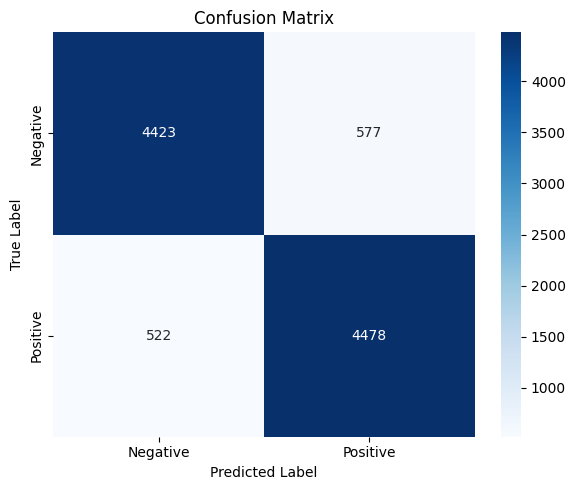

In [31]:
cm = confusion_matrix(y_test, y_pred)
labels = ['Negative', 'Positive']

# Buat heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [32]:
print(f"\n🎯 Accuracy: {accuracy_score(y_test, y_pred):.4f}")


🎯 Accuracy: 0.8901


## 4. Simulation

### 4.1 Functions

In [1]:
import re
import string
import joblib
import numpy as np
from html import unescape
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import spacy
from gensim.models import FastText
from scipy.sparse import hstack, csr_matrix

In [2]:
# Setup
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to /home/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/user/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
# Load preprocessing assets
custom_stopwords = {'film', 'movie', 'scene', 'character', 'story', 'watch', 'see', 'make', 'time', 'people', 'thing'}
stop_words = set(stopwords.words('english')).union(custom_stopwords)

def preprocess_text(text):
    text = unescape(text)
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    doc = nlp(" ".join(tokens))
    tokens = [token.lemma_ for token in doc]
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(tokens)

In [4]:
def get_average_vector(tokens, model, vector_size=100):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

In [5]:
vectorizer = joblib.load('output/tfidf/IMDB_dataset_50000_tfidf_vectorizer.pkl')
selector = joblib.load('output/tfidf/IMDB_dataset_50000_tfidf_chi2.pkl')
fasttext_model = FastText.load('output/fasttext/IMDB_dataset_50000_fasttext.model')
svm_model = joblib.load('models/generated/svm_tfidf_chi2_fasttext.pkl')

### 4.2 Test - Custom Single Text

In [6]:
custom_text = """
I was completely blown away by the storyline and the acting. 
This is one of the best movies I’ve seen in years!
"""

cleaned = preprocess_text(custom_text)
tokens = word_tokenize(cleaned)

X_tfidf = vectorizer.transform([cleaned])
X_selected = selector.transform(X_tfidf)

X_fasttext = np.array([get_average_vector(tokens, fasttext_model, 100)])
X_combined = hstack([X_selected, csr_matrix(X_fasttext)])

prediction = svm_model.predict(X_combined)[0]
print(f"\nPredicted Sentiment: {prediction.upper()}")


Predicted Sentiment: POSITIVE


In [10]:
custom_text = """
This was a complete waste of time. The plot was dull, the characters were annoying, and the dialogue felt forced. 
I honestly don't understand how this movie got made. I wouldn’t recommend it to anyone.
"""

cleaned = preprocess_text(custom_text)
tokens = word_tokenize(cleaned)

X_tfidf = vectorizer.transform([cleaned])
X_selected = selector.transform(X_tfidf)

X_fasttext = np.array([get_average_vector(tokens, fasttext_model, 100)])
X_combined = hstack([X_selected, csr_matrix(X_fasttext)])

prediction = svm_model.predict(X_combined)[0]
print(f"\nPredicted Sentiment: {prediction.upper()}")


Predicted Sentiment: NEGATIVE


### 4.3 Test - TMBD API

In [33]:
import requests
import os
from dotenv import load_dotenv

In [34]:
def fetch_reviews_from_tmdb(title, max_reviews=10):
    # Step 1: Cari ID film
    search_url = f"https://api.themoviedb.org/3/search/movie"
    params = {"api_key": TMDB_API_KEY, "query": title}
    res = requests.get(search_url, params=params).json()
    results = res.get("results")
    if not results:
        print("Film tidak ditemukan.")
        return []

    movie_id = results[0]["id"]

    # Step 2: Ambil reviews
    review_url = f"https://api.themoviedb.org/3/movie/{movie_id}/reviews"
    review_res = requests.get(review_url, params={"api_key": TMDB_API_KEY}).json()
    reviews = review_res.get("results", [])[:max_reviews]

    return [r["content"] for r in reviews]

In [36]:
load_dotenv()
TMDB_API_KEY = os.getenv('TMDB_API_KEY')

In [41]:
# ========== MAIN EKSEKUSI ==========
title = "Tangled"
reviews = fetch_reviews_from_tmdb(title)

print("Total fetched reviews:", len(reviews))

if not reviews:
    print("Tidak ada review ditemukan.")
else:
    print(f"\nReview dari TMDb untuk '{title}':\n")
    counts = {"positive": 0, "negative": 0}
    for i, review in enumerate(reviews):
        cleaned = preprocess_text(review)
        tokens = word_tokenize(cleaned)
        X_tfidf = vectorizer.transform([cleaned])
        X_selected = selector.transform(X_tfidf)
        X_fasttext = np.array([get_average_vector(tokens, fasttext_model, 100)])
        X_combined = hstack([X_selected, csr_matrix(X_fasttext)])
        prediction = svm_model.predict(X_combined)[0]
        counts[prediction] += 1
        print(f"Review #{i+1} — {prediction.upper()}\n{review[:300]}...\n")

    print(f"\nTotal Sentimen dari 10 Review:")
    print(f"Positive: {counts['positive']}")
    print(f"Negative: {counts['negative']}")

Total fetched reviews: 4

Review dari TMDb untuk 'Tangled':

Review #1 — NEGATIVE
Tangled main characters really remember Aladdin's. The chameleon character could have been more juicy and it also repeats with stubborn determination Disney's intent of making any other animal to behave like dogs.

All in all, it is a stereotypical Disney movie that nails the template but it does ...

Review #2 — POSITIVE
Been wanting to watch this movie for quite some time. But then I wasn't sure if I really wanted to watch this or not because it might be just like Frog Prince (which I haven't seen completely yet). Even if I was tired (slept late the night before and woke up early when we got a phone call that Matt ...

Review #3 — POSITIVE
An enjoyable tale about Rapunzel.

<em>'Tangled'</em> kicks off Disney's animated releases for the 2010s in very strong fashion. It's nicely created, with fun characters and a hearty storyline. It actually sets a lot of the foundations that 2013's <em>'Frozen'</em> us